In [1]:
import pandas as pd
import numpy as np
import zipfile
import os
from math import radians

import seaborn as sns

from pathlib import Path
from geopy.distance import geodesic

import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

In [2]:
current_directory = Path.cwd()

data_directory = Path(current_directory, 'data')

zip_file_path = Path(data_directory, '202403-citibike-tripdata.csv.zip')

# Directory to extract the files
data_directory = Path(current_directory, 'data')

# List to hold DataFrames
dfs = []

# Open the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(data_directory)

# List all files in the extracted directory
extracted_files = os.listdir(data_directory)

# Filter only CSV files
csv_files = [file for file in extracted_files if file.endswith('.csv')]

# Read each CSV file into a DataFrame and append to dfs list
for file in csv_files:
    df = pd.read_csv(Path(data_directory, file))
    dfs.append(df)

# Concatenate all DataFrames in the list
biketrips = pd.concat(dfs, ignore_index=True)

C:\Users\dkorzel\AppData\Local\Temp\ipykernel_2608\2210469.py:25: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(Path(data_directory, file))
C:\Users\dkorzel\AppData\Local\Temp\ipykernel_2608\2210469.py:25: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(Path(data_directory, file))
C:\Users\dkorzel\AppData\Local\Temp\ipykernel_2608\2210469.py:25: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(Path(data_directory, file))


In [3]:
biketrips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2737881 entries, 0 to 2737880
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 271.5+ MB


In [4]:
# Trips over 30 minutes

# Convert start & end to datetime objects
biketrips['started_at'] = pd.to_datetime(biketrips['started_at'])
biketrips['ended_at'] = pd.to_datetime(biketrips['ended_at'])

# Calculate the time difference in minutes
biketrips['time_difference'] = round((biketrips['ended_at'] - biketrips['started_at']).dt.total_seconds() / 60, 2)

# Create a flag
biketrips['trips_over_30_min'] = biketrips['time_difference'] > 30

In [5]:
trips_over_30_min = biketrips['trips_over_30_min'].sum()
print("In March, " + str(trips_over_30_min) + " bike trips would be covered by insurance.")

In March, 172188 bike trips would be covered by insurance.


In [6]:
revenue = trips_over_30_min * 0.2
print("By charging 0.2 USD per trip exceeding 30 min, we anticipate revenue of " + str(revenue) + " USD.")

By charging 0.2 USD per trip exceeding 30 min, we anticipate revenue of 34437.6 USD.


In [7]:
biketrips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2737881 entries, 0 to 2737880
Data columns (total 15 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  time_difference     float64       
 14  trips_over_30_min   bool          
dtypes: bool(1), datetime64[ns](2), float64(5), object(7)
memory usage: 295.0+ MB


In [8]:
biketrips.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,time_difference,trips_over_30_min
0,0FC89A53DF9D7E90,electric_bike,2024-03-07 19:49:43,2024-03-07 20:20:33,48 St & Skillman Ave,6283.05,Kingston Ave & Park Pl,4016.03,40.746154,-73.916189,40.673080,-73.941910,member,30.83,True
1,0FF38F5D1277746B,electric_bike,2024-03-15 17:45:30,2024-03-15 17:55:39,Liberty St & Broadway,5105.01,Mercer St & Spring St,5532.01,40.708859,-74.010232,40.723627,-73.999496,member,10.15,False
2,DE040AD144FB0BFA,electric_bike,2024-03-19 18:00:52,2024-03-19 18:07:26,W 56 St & 6 Ave,6809.07,E 43 St & Madison Ave,6551.11,40.763406,-73.977225,40.753547,-73.978966,member,6.57,False
3,5C7DFD80B04BBA5A,electric_bike,2024-03-05 17:25:30,2024-03-05 17:30:17,W 56 St & 6 Ave,6809.07,E 43 St & Madison Ave,6551.11,40.763062,-73.977672,40.753547,-73.978966,member,4.78,False
4,5C0A03B95B0D0A0F,electric_bike,2024-03-22 13:18:37,2024-03-22 13:23:24,5 Ave & W 126 St,7701.21,Frederick Douglass Blvd & W 115 St,7658.13,40.660947,-73.983043,40.803865,-73.955931,member,4.78,False


In [9]:
def haversine(row):
    
    lng1, lat1, lng2, lat2 = map(radians, [row['start_lng'], row['start_lat'], row['end_lng'], row['end_lat']])
    dlng = lng2 - lng1
    dlat = lat2 - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlng/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

biketrips['distance'] = biketrips.apply(lambda row: haversine(row), axis=1)

In [10]:
biketrips['trips_between_0_1'] = biketrips['distance'] <= 1
biketrips['trips_between_2_4'] = (biketrips['distance'] > 2) & (biketrips['distance'] <= 4)
biketrips['trips_between_4_9'] = (biketrips['distance'] > 4) & (biketrips['distance'] <= 9)
biketrips['trips_over_10'] = biketrips['distance'] > 10

In [11]:
sums = biketrips[['trips_between_0_1', 'trips_between_2_4', 'trips_between_4_9', 'trips_over_10']].sum()

In [12]:
sums_df = pd.DataFrame(sums, columns=['Number of Trips'])

# Reset index to make 'Distance Buckets' a regular column
sums_df.reset_index(inplace=True)
sums_df.rename(columns={'index': 'Distance Buckets'}, inplace=True)

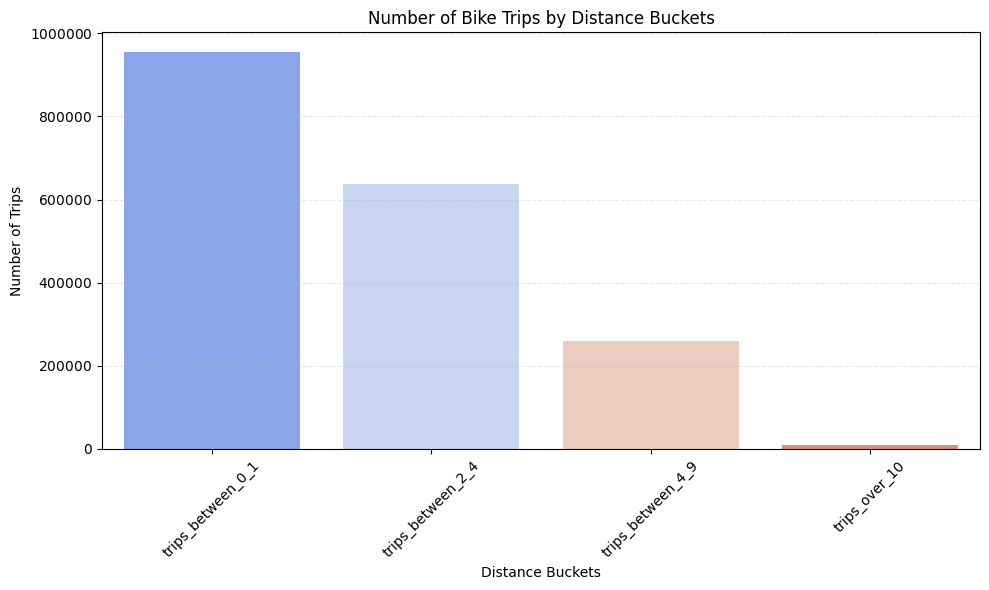

In [13]:
plt.figure(figsize=(10, 6))
chart = sns.barplot(x='Distance Buckets', y='Number of Trips', hue= 'Distance Buckets', data=sums_df, palette='coolwarm')

chart.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
chart.ticklabel_format(style='plain', axis='y')

plt.title('Number of Bike Trips by Distance Buckets')
plt.xlabel('Distance Buckets')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()